#Week HW2 by Dmitriev Egor
[Link to watch online](https://colab.research.google.com/drive/1mxXP00wSBQHaATygTQDxxgtFl1xuLuF8)

## Task 1

### Given:

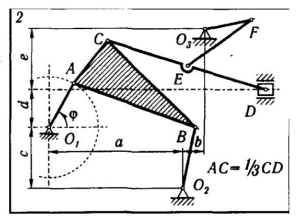

$\omega_{O_1A} = 2 rad/s;\\
\phi = 60°;
\\
a = 56;\ b = 10;\ c = 26;\ d = 16;\ e = 25;
\\
O_1A = 21;\ O_2B = 25;\ O_3F = 20;
\\
AB = 54;\ AC = 23;\ BC = 52;\ CD = 69;\ CE = 35;\ EF = 32.$

### Find:

1. Obtain all positions (simulate the mechanism)
1. Obtain velocities for $A,\ B,\ C,\ E,\ F,\ D$.
1. Find angular velocities for all links
1. Acceleratin for $A$ and $B$ and angular velocity for $AB$
1. Plot all of the above


### Soultion:

#### Prepare the timeline

In [ ]:
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 

# set the timeframe
t0 = 0
t1 = np.pi #Pi to make nice looped animation
dt = 0.01 #100 fps

T = np.arange(t0, t1, dt) # generate an array of timestamps

#### Prepare all of the parameters

In [ ]:
omega_O1 = 2
phi_O1 = np.radians(60) #60deg to radians

a = 56
b = 10
c = 26
d = 16
e = 25

O1A = 21
O2B = 25
O3F = 20

AB = 54
AC = 23
BC = 52
CD = 69
CE = 35
EF = 32

#### Movement of $A$
* $\underline{A_x = O_1A*cos(\phi + \omega_{O_1} t))}$
* $\underline{A_y = O_1A*sin(\phi + \omega_{O_1} t)}$

In [ ]:
# parametric equation of particle's movement
def x(t):
  return O1A * np.cos(phi_O1 + omega_O1*t)

def y(t):
  return O1A * np.sin(phi_O1 + omega_O1*t)
  
A = np.array([list(map(x, T)), list(map(y, T))])
# print(A)

#### Movement of $B$

##### Trying to make it with varables (failed)

$
\begin{cases}
(A_x-B_x)^2 + (A_y - B_y)^2 = AB^2
\\
(B_x - O_{2x})^2 + (B_y - O_{2y})^2 = O_2B^2
\end{cases}
$

$
\begin{cases}
(B_x - A_x)^2 + (B_y - A_y)^2 = AB^2
\\
(B_x - a)^2 + (B_y + c)^2 = O_2B^2
\end{cases}
$

$
\begin{cases}
(B_x^2 -2B_xA_x + A_x^2) + (B_y^2 - 2B_yA_y + A_y^2) = AB^2
\\
(B_x^2 -2B_xa + a^2) + (B_y^2 - 2B_yc + c^2) = O_2B^2
\end{cases}
$
Substract one from another
* $
(B_x^2 -2B_xA_x + A_x^2) - (B_x^2 -2B_xa + a^2) + (B_y^2 - 2B_yA_y + A_y^2) - (B_y^2 - 2B_yc + c^2) = AB^2 - O_2B^2
$

* $
(-2B_xA_x + A_x^2) - (-2B_xa + a^2) + (- 2B_yA_y + A_y^2) - (- 2B_yc + c^2) = AB^2 - O_2B^2
$

* $
(-2A_x +2a)B_x + (-2A_y+ 2c)B_y + (A_x^2 - a^2 + A_y^2 - c^2) = AB^2-O_2B^2
$

* $
(-2A_x +2a)B_x + (-2A_y+ 2c)B_y = (AB^2-O_2B^2) - (A_x^2 - a^2 + A_y^2 - c^2)
$

* $
B_x = \frac{ (AB^2-O_2B^2) - (A_x^2 - a^2 + A_y^2 - c^2) + (2A_y - 2c)B_y}{(-2A_x + 2a)}
$

* $
\begin{cases}
B_x = \frac{ (AB^2-O_2B^2) - (A_x^2 - a^2 + A_y^2 - c^2) + (2A_y - 2c)B_y}{(-2A_x + 2a)}
\\
(B_x - a)^2 + (B_y + c)^2 = O_2B^2
\end{cases}
$

* $
(\frac{AB^2-O_2B^2 - A_x^2 + a^2 - A_y^2 + c^2 + (2A_y - 2c)B_y}{(-2A_x + 2a)} - a)^2 + (B_y + c)^2 = O_2B^2
$

* $
(\frac{AB^2-O_2B^2 - A_x^2 + a^2 - A_y^2 + c^2 + (2A_y - 2c)B_y -a (-2A_x +2a)}{(-2A_x + 2a)})^2 + (B_y + c)^2 = O_2B^2
$

* $
(\frac{AB^2-O_2B^2 - A_x^2 - A_y^2 + c^2 + (2A_y - 2c)B_y - a^2 + 2aA_x}{(-2A_x + 2a)})^2 + (B_y + c)^2 = O_2B^2
$

* $
(\frac{(2A_y - 2c)B_y + (AB^2-O_2B^2 - A_x^2 - a^2 - A_y^2 + c^2 + 2aA_x)}{(-2A_x + 2a)})^2 + (B_y^2 + 2cB_y + c^2) = O_2B^2
$

* $
(\frac{((2A_y - 2c)B_y)^2 + 2(2A_y - 2c)B_y(AB^2-O_2B^2 - A_x^2 - a^2 - A_y^2 + c^2 + 2aA_x) + (AB^2-O_2B^2 - A_x^2 - a^2 - A_y^2 + c^2  + 2aA_x)^2}{(-2A_x + 2a)^2}) + (B_y^2 + 2cB_y + c^2) = O_2B^2
$

* $
\frac{((2A_y - 2c)B_y)^2 + 2(2A_y - 2c)B_y(AB^2-O_2B^2 - A_x^2 - a^2 - A_y^2 + c^2 + 2aA_x) + (AB^2-O_2B^2 - A_x^2 - a^2 - A_y^2 + c^2 + 2aA_x)^2}{(-2A_x + 2a)^2} + (B_y^2 + 2cB_y + c^2) = O_2B^2
$

* $
\left(\frac{A_y^2 - 2cA_y + c^2}{(-A_x + a)^2} + 1\right)B_y^2
+ 
\left(\frac{4(A_y - c)(AB^2-O_2B^2 - A_x^2 - a^2 - A_y^2 + c^2 + 2aA_x)}{(-A_x + a)^2}+2c\right)B_y
+
\frac{(AB^2-O_2B^2 - A_x^2 - a^2 - A_y^2 + c^2 + 2aA_x)^2}{(-2A_x + 2a)^2} + c^2 - O_2B^2 = 0
$

##### Being smart and using [Google](https://pyquestions.com/finding-the-intersection-of-two-circles)

In [ ]:
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sympy.solvers import solve
from sympy import Symbol, symbols, Eq, solve

def get_intersections(x0, y0, r0, x1, y1, r1):
  # circle 1: (x0, y0), radius r0
  # circle 2: (x1, y1), radius r1
  d=np.sqrt((x1-x0)**2 + (y1-y0)**2)

  # non intersecting
  if d > r0 + r1 :
    
    return [[np.NaN]*2]*2
  # One circle within other
  if d < abs(r0-r1):
    return [[np.NaN]*2]*2

  # coincident circles
  if d == 0 and r0 == r1:
    return [[np.NaN]*2]*2

  else:
    a=(r0**2-r1**2+d**2)/(2*d)
    h=np.sqrt(r0**2-a**2)
    x2=x0+a*(x1-x0)/d
    y2=y0+a*(y1-y0)/d
    x3=x2+h*(y1-y0)/d
    y3=y2-h*(x1-x0)/d
    x4=x2-h*(y1-y0)/d
    y4=y2+h*(x1-x0)/d

    return [[x3, y3], [x4, y4]]

# x0 - A[0]
# y0 - A[1]
# r0 - AB
# x1 - O2_x = a
# y1 - O2_y = -c
# r1 - O2B

B = [get_intersections(x0, y0, AB, a, -c, O2B) for (x0, y0) in np.transpose(A)]
# print(B)

B1 = np.transpose([i[0] for i in B])
B2 = np.transpose([i[1] for i in B])
# print(B1.shape)
# print(B1[0], sep='\n')
# print(B2, sep='\n')

#### Movement of $C$
$\vec {AC} = R\frac{\vec{AB}*AC}{AB}\\
R = 
\begin{bmatrix}
cos(60°) & sin(-60°)\\
sin(60°) & cos(60°)
\end{bmatrix}
$

In [ ]:
def rotMat(tetha):
  return np.array([[np.cos(tetha), -np.sin(tetha)],
                     [np.sin(tetha),  np.cos(tetha)]])


R = rotMat(np.radians(60))
C = A + R@(np.array([B2[0]-A[0], B2[1]-A[1]])*AC/AB)
# print(C)

#### Movement of $D$

In [ ]:
!pip install scikit-spatial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.1 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.12.0
    Uninstalling importlib-metadata-4.12.0:
      Successfully uninstalled importlib-metadata-4.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.4.1 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 1.7.0 which is incompatible.
gym 0.25.2 requires importlib-metadata>=4.8.0; python_version < "3.10", but you have importlib-metadata 1.7.0 which is incompatible.


In [ ]:
from skspatial.objects import Circle, Line, Point


D = [Circle(p, CD).intersect_line(Line([0, d], [1, 0])) 
      if not (np.isnan(p[0]) or np.isnan(p[1])) 
      else [[np.nan]*2]*2
      for p in np.transpose(C)]

print(np.array(D).shape)
D1 = np.transpose([i[0] for i in D])
D2 = np.transpose([i[1] for i in D])

print(*D1, sep='\n')

(315, 2, 2)
[-38.52464116 -38.81391518 -39.10895303 -39.40965994 -39.71593766
 -40.02768432 -40.34479423 -40.66715772 -40.99466098 -41.3271859
 -41.66460988 -42.0068057  -42.3536413  -42.70497967 -43.06067864
 -43.42059069 -43.78456281 -44.15243626 -44.52404638 -44.89922238
 -45.27778705 -45.65955652 -46.04433998 -46.43193924 -46.82214843
 -47.21475345 -47.60953143 -48.00625008 -48.40466683 -48.80452786
 -49.20556682 -49.60750331 -50.01004085 -50.41286434 -50.81563671
 -51.21799446 -51.6195417  -52.0198418  -52.41840571 -52.81467489
 -53.20799558 -53.59757844 -53.98243179 -54.3612435  -54.73215291
 -55.09225269 -55.43627752 -55.75180646 -55.97253235          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan

#### Movement of E

$\vec E = \vec C + \vec{CE} = \vec C + \frac{\vec{CD}*CE}{CD}$

In [ ]:
E = C + np.array(D2-C)/CD*CE
# print(E)

#### Movement of F

In [ ]:
F = [get_intersections(x0, y0, EF, a+b, d+e, O3F) for (x0, y0) in np.transpose(E)]
# print(F)

F1 = np.transpose([i[0] for i in F])
F2 = np.transpose([i[1] for i in F])

####Velocities

In [ ]:
vA = np.array([np.gradient(A[0], T), np.gradient(A[1],T)])
vB2 = np.array([np.gradient(B2[0], T), np.gradient(B2[1],T)])
vC = np.array([np.gradient(C[0], T), np.gradient(C[1],T)])
vD2 = np.array([np.gradient(D2[0], T), np.gradient(D2[1],T)])
vE = np.array([np.gradient(E[0], T), np.gradient(E[1],T)])
vF1 = np.array([np.gradient(F1[0], T), np.gradient(F1[1],T)])

#### Accelarations

In [ ]:
aA = np.array([np.gradient(vA[0], T), np.gradient(vA[1],T)])
aB2 = np.array([np.gradient(vB2[0], T), np.gradient(vB2[1],T)])
aC = np.array([np.gradient(vC[0], T), np.gradient(vC[1],T)])
aD2 = np.array([np.gradient(vD2[0], T), np.gradient(vD2[1],T)])
aE = np.array([np.gradient(vE[0], T), np.gradient(vE[1],T)])
aF1 = np.array([np.gradient(vF1[0], T), np.gradient(vF1[1],T)])

#### Normal Acceleration

In [ ]:
def project(u, v):
  ret = np.dot(u, v)*v/np.dot(v, v)
  return ret

aAn = np.transpose(list(map(project, np.transpose(aA), np.transpose(vA))))
aB2n = np.transpose(list(map(project, np.transpose(aB2), np.transpose(vB2))))
aCn = np.transpose(list(map(project, np.transpose(aC), np.transpose(vC))))
aD2n = np.transpose(list(map(project, np.transpose(aD2), np.transpose(vD2))))
aEn = np.transpose(list(map(project, np.transpose(aE), np.transpose(vE))))
aF1n = np.transpose(list(map(project, np.transpose(aF1), np.transpose(vF1))))

#### Tangental Acceleration

In [ ]:
aAt = np.array(aA) - aAn
aB2t = np.array(aB2) - aB2n
aCt = np.array(aC) - aCn
aD2t = np.array(aD2) - aD2n
aEt = np.array(aE) - aEn
aF1t = np.array(aF1) - aF1n

#### Angular Velocity
As [derivative of `atan2`](https://math.stackexchange.com/questions/3570633/derivative-of-arctan2)

In [ ]:
def atan2Prime(y, x, T):
  dot_y = np.gradient(y, T)
  dot_x = np.gradient(x, T)
  return (dot_y*x-y*dot_x)/(y**2+x**2)

omegaO3A = atan2Prime(A[1]-0, A[0]-0, T)
omegaAB2C = atan2Prime(A[1]-B2[1], A[0]-B2[0], T)
omegaO2B2 = atan2Prime(B2[1]-a, B2[0]+c, T)
omegaCD2 = atan2Prime(D2[1]-C[1], D2[0]-C[0], T)
omegaEF1 = atan2Prime(F1[1]-E[1], F1[0]-E[0], T)
omegaO3F1 = atan2Prime(F1[1]-a-b, F1[0]-d-e, T)

#### Angular acceleration
As derivative of Angular Velocity

In [ ]:
epsilonO3A = np.gradient(omegaO3A, T)
epsilonAB2C = np.gradient(omegaAB2C, T)
epsilonO2B2 = np.gradient(omegaO2B2, T)
epsilonCD2 = np.gradient(omegaCD2, T)
epsilonEF1 = np.gradient(omegaEF1, T)
epsilonO3F1 = np.gradient(omegaO3F1, T)

### Animation

#### Encapsulation for points and lines

In [ ]:
class point:
  def __init__(self, pos, col=None, title=None, alpha=1, marker=None):
    self.pos = pos
    self.col = col
    self.title = title
    self.alpha = alpha
    self.marker = marker

  def isNan(self, n):
    if not hasattr(self.pos, "__len__"):
      if self.pos is None or np.isNan(self.pos):
        return True
      else:
        return False
    else:
      if not hasattr(self.pos[0], "__len__"):
        if any(self.pos is None or np.isnan(self.pos)):
          self.p.set_visible(False)
      else:
        if self.pos[0][n] is None or np.isnan(self.pos[0][n]):
          self.p.set_visible(False)


class line:
    def __init__(self, a, b, col='k'):
      self.a = a
      self.b = b
      self.col = col

class system:
  def __init__(self, ax):
    self.ax = ax
    self.points = {}
    self.lines = []

  def addPoint(self, point):
    self.points[point.title] = point
    if hasattr(point.pos[0], "__len__"):
      point.p, = self.ax.plot(point.pos[0][0], point.pos[1][0], point.col, marker=point.marker, ms=20, label=point.title)
    else:
      point.p, = self.ax.plot(point.pos[0], point.pos[1], point.col, marker=point.marker, ms=20, label=point.title, alpha = point.alpha)

  def addLine(self, line):
    # print(line.a.pos, line.b.pos)
    self.lines.append(line)
    pa = [line.a.pos[0][0], line.a.pos[1][0]] if hasattr(line.a.pos[0], "__len__") else [line.a.pos[0], line.a.pos[1]]
    pb = [line.b.pos[0][0], line.b.pos[1][0]] if hasattr(line.b.pos[0], "__len__") else [line.b.pos[0], line.b.pos[1]]
    # print(pa, pb)
    line.l, = self.ax.plot([pa[0], pb[0]], [pa[1], pb[1]], lw=2, zorder = -10, color = line.col)

  def draw(self, frame):
    for point in self.points.values():
      if point.isNan(frame):
        point.p.set_visible(False)
      else:
        point.p.set_visible(True)
        if hasattr(point.pos[0], "__len__"):
          point.p.set_data(point.pos[0][frame], point.pos[1][frame])
        else:
          point.p.set_data(point.pos[0], point.pos[1])

    for line in self.lines:
      if line.a.isNan(frame) or line.b.isNan(frame):
        point.p.set_visible(False)
      else:
        point.p.set_visible(True)
        pa = [line.a.pos[0][frame], line.a.pos[1][frame]] if hasattr(line.a.pos[0], "__len__") else [line.a.pos[0], line.a.pos[1]]
        pb = [line.b.pos[0][frame], line.b.pos[1][frame]] if hasattr(line.b.pos[0], "__len__") else [line.b.pos[0], line.b.pos[1]]
        line.l.set_data([pa[0], pb[0]], [pa[1], pb[1]])     
        
    return [line.l for line in self.lines]

#### Vectors encapsulation

In [ ]:
from matplotlib.lines import Line2D
# Gateher all the moving vectors and plug them into given plots ax1 (dynamic), ax2 (static)
class draw_vec:
  def __init__(self, labels, parent, vectors, ax1, ax2, col=None, lw1=None, lw2=None, scale=None, scale1 = 1):
    self.n = len(vectors)
    self.parent = {'x': parent[0], 'y':parent[1]}
    self.vectors = {'x': vectors[:, 0], 'y':vectors[:, 1]}
    self.q1 = ax1.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, width=lw1, visible=False,
                         scale=1/scale/scale1, angles='xy', scale_units='xy', zorder = 10)
    self.q2 = ax2.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, width=lw2, visible=False,
                         scale=1/scale, angles='xy', scale_units='xy', zorder = 10)
    
    custom_lines = [Line2D([0], [0], color=i, lw=4) for i in col]
    fig.legend(custom_lines, labels, loc='upper left')

  def draw(self, n, show = True):
    self.q1.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q2.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q1.set_offsets([self.parent['x'][n], self.parent['y'][n]])
    self.q1.set_visible(show)
    self.q2.set_visible(show)

  def getVectors(self):
    return([self.q1, self.q2])

#### Create box for $D$

In [ ]:
vs = 30
box_w = 4
box_h = 2
box_p = [np.array([-1, 1, 1, -1, -1])*box_w, np.array([-1, -1, 1, 1, -1])*box_h]

#### Actual plot

In [ ]:
import matplotlib.pyplot as plt

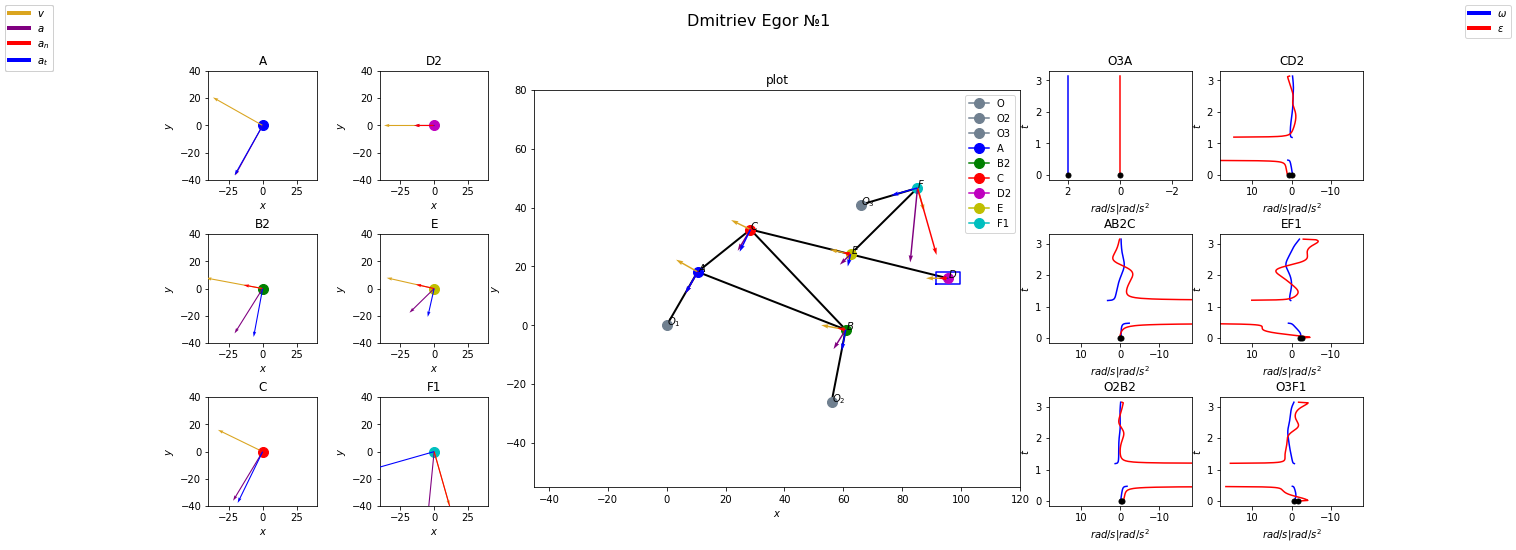

In [ ]:
 %matplotlib inline

# setup the plot
grid = plt.GridSpec(3, 7, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №1", fontsize=16)
ax1 = plt.subplot(grid[:, 2:5], aspect='equal')
v1 = plt.subplot(grid[0, 0], aspect='equal', title='A')
v2 = plt.subplot(grid[1, 0], aspect='equal', title='B2')
v3 = plt.subplot(grid[2, 0], aspect='equal', title='C')
v4 = plt.subplot(grid[0, 1], aspect='equal', title='D2')
v5 = plt.subplot(grid[1, 1], aspect='equal', title='E')
v6 = plt.subplot(grid[2, 1], aspect='equal', title='F1')

plot_v = [v1, v2, v3, v4, v5, v6]
for i in plot_v:
  i.set_xlim((-40, 40))
  i.set_ylim((-40, 40))
  i.set_xlabel(r'$x$')
  i.set_ylabel(r'$y$')

a1 = plt.subplot(grid[0, 5], title='O3A')
a2 = plt.subplot(grid[1, 5], title='AB2C')
a3 = plt.subplot(grid[2, 5], title='O2B2')
a4 = plt.subplot(grid[0, 6], title='CD2')
a5 = plt.subplot(grid[1, 6], title='EF1')
a6 = plt.subplot(grid[2, 6], title='O3F1')

plot_a = [a1, a2, a3, a4, a5, a6]
for i in plot_a:
  i.set_xlabel(r'$rad/s | rad/s^2$')
  i.set_ylabel(r'$t$')

# setup subplot 1
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_xlim((-45, 120))
ax1.set_ylim((-55, 80))
txt_title = ax1.set_title('plot')

p_O = point([0, 0], col='slategrey', marker='.', title='O')
p_O2 = point([a, -c], col='slategrey', marker='.', title='O2')
p_O3 = point([a+b, d+e], col='slategrey', marker='.', title='O3')
p_A = point([A[0], A[1]], col='b', marker='.', title='A')
p_B2 = point([B2[0], B2[1]], col='g', marker='.', title='B2')
p_C = point([C[0], C[1]], col='r', marker='.', title='C')
p_D2 = point([D2[0], D2[1]], col='m', marker='.', title='D2')
p_E = point([E[0], E[1]], col='y', marker='.', title='E')
p_F1 = point([F1[0], F1[1]], col='c', marker='.', title='F1')

v1.plot(0, 0, 'b.', ms=20)
v2.plot(0, 0, 'g.', ms=20)
v3.plot(0, 0, 'r.', ms=20)
v4.plot(0, 0, 'm.', ms=20)
v5.plot(0, 0, 'y.', ms=20)
v6.plot(0, 0, 'c.', ms=20)

sys = system(ax1)
sys.addPoint(p_O) 
sys.addPoint(p_O2) 
sys.addPoint(p_O3) 
sys.addPoint(p_A) 
sys.addPoint(p_B2) 
sys.addPoint(p_C) 
sys.addPoint(p_D2)
sys.addPoint(p_E)
sys.addPoint(p_F1) 

sys.addLine(line(p_O, p_A))
sys.addLine(line(p_O2, p_B2))
sys.addLine(line(p_A, p_B2))
sys.addLine(line(p_A, p_C))
sys.addLine(line(p_B2, p_C))
sys.addLine(line(p_C, p_D2))
sys.addLine(line(p_O3, p_F1))
sys.addLine(line(p_E, p_F1))

b_Box, = ax1.plot(box_p[0]+D2[0][0], box_p[1]+D2[1][0], zorder = -5, color='b')


v_A = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], A, np.array([vA, aA, aAn, aAt]), 
               col = ['goldenrod', 'purple', 'red', 'blue'],
               scale = 1, ax1=ax1, ax2=v1, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_B2 = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], B2, np.array([vB2, aB2, aB2n, aB2t]), 
               col = ['goldenrod', 'purple', 'red', 'blue'],
               scale = 1, ax1=ax1, ax2=v2, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_C = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], C, np.array([vC, aC, aCn, aCt]), 
               col = ['goldenrod', 'purple', 'red', 'blue'],
               scale = 1, ax1=ax1, ax2=v3, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_D2 = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], D2, np.array([vD2, aD2, aD2n, aD2t]), 
               col = ['goldenrod', 'purple', 'red', 'blue'],
               scale = 1, ax1=ax1, ax2=v4, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_E = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], E, np.array([vE, aE, aEn, aEt]), 
               col = ['goldenrod', 'purple', 'red', 'blue'],
               scale = 1, ax1=ax1, ax2=v5, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_F1 = draw_vec([r'$v$', r'$a$', r'$a_n$', r'$a_t$'], F1, np.array([vF1, aF1, aF1n, aF1t]), 
               col = ['goldenrod', 'purple', 'red', 'blue'],
               scale = 1, ax1=ax1, ax2=v6, lw1 = 0.003, lw2=0.01, scale1 = 0.2)

v_A.draw(0, show=True)
v_B2.draw(0, show=True)
v_C.draw(0, show=True)
v_D2.draw(0, show=True)
v_E.draw(0, show=True)
v_F1.draw(0, show=True)

handles = [Line2D([0], [0], color='b', lw=4),
           Line2D([0], [0], color='r', lw=4)]
lables = [r'$\omega$',
          r'$\epsilon$']
fig.legend(handles, lables, loc='upper right')

a1.plot(omegaO3A, T, 'b')
a1.plot(epsilonO3A, T, 'r')
a1p1, = a1.plot(omegaO3A[0], 0, 'k.', ms=10)
a1p2, = a1.plot(epsilonO3A[0], 0, 'k.', ms=10)

a2.plot(omegaAB2C, T, 'b')
a2.plot(epsilonAB2C, T, 'r')
a2p1, = a2.plot(omegaAB2C[0], 0, 'k.', ms=10)
a2p2, = a2.plot(epsilonAB2C[0], 0, 'k.', ms=10)

a3.plot(omegaO2B2, T, 'b')
a3.plot(epsilonO2B2, T, 'r')
a3p1, = a3.plot(omegaO2B2[0], 0, 'k.', ms=10)
a3p2, = a3.plot(epsilonO2B2[0], 0, 'k.', ms=10)

a4.plot(omegaCD2, T, 'b')
a4.plot(epsilonCD2, T, 'r')
a4p1, = a4.plot(omegaCD2[0], 0, 'k.', ms=10)
a4p2, = a4.plot(epsilonCD2[0], 0, 'k.', ms=10)

a5.plot(omegaEF1, T, 'b')
a5.plot(epsilonEF1, T, 'r')
a5p1, = a5.plot(omegaEF1[0], 0, 'k.', ms=10)
a5p2, = a5.plot(epsilonEF1[0], 0, 'k.', ms=10)

a6.plot(omegaO3F1, T, 'b')
a6.plot(epsilonO3F1, T, 'r')
a6p1, = a6.plot(omegaO3F1[0], 0, 'k.', ms=10)
a6p2, = a6.plot(epsilonO3F1[0], 0, 'k.', ms=10)

for i in plot_a:
  xabs_max = min(14, abs(max(i.get_xlim(), key=abs)))
  i.set_xlim(xabs_max*1.3, -xabs_max*1.3)

Stitles = [r"$O_1$", r"$O_2$", r"$O_3$"]
Spoints = [[0, 0], [a, -c], [a+b, d+e]]
Dtitles = [ r"$A$", r"$B$", r"$C$", r"$D$", r"$E$", r"$F$"]
Dpoints = [A, B2, C, D2, E, F1]
Dannotation = []
for (i, text) in enumerate(Stitles):
  # print(Spoints[i])
  ax1.annotate(text, xy=(Spoints[i]))
for (i, text) in enumerate(Dtitles):
  # print(Dpoints[i][:, 0])
  Dannotation.append(ax1.annotate(text, xy=(Dpoints[i][:, 0])))

ax1.legend()

def drawframe(n):
  lines = sys.draw(n)
  b_Box.set_data(box_p[0]+D2[0][n], box_p[1]+D2[1][n])

  for (i, annot) in enumerate(Dannotation):
    annot.set(position=Dpoints[i][:, n])

  v_A.draw(n, show=True)
  v_B2.draw(n, show=True)
  v_C.draw(n, show=True)
  v_D2.draw(n, show=True)
  v_E.draw(n, show=True)
  v_F1.draw(n, show=True)

  a1p1. (omegaO3A[n], T[n])
  a1p2.set_data(epsilonO3A[n], T[n])
  a2p1.set_data(omegaAB2C[n], T[n])
  a2p2.set_data(epsilonAB2C[n], T[n])
  a3p1.set_data(omegaO2B2[n], T[n])
  a3p2.set_data(epsilonO2B2[n], T[n])
  a4p1.set_data(omegaCD2[n], T[n])
  a4p2.set_data(epsilonCD2[n], T[n])
  a5p1.set_data(omegaEF1[n], T[n])
  a5p2.set_data(epsilonEF1[n], T[n])
  a6p1.set_data(omegaO3F1[n], T[n])
  a6p2.set_data(epsilonO3F1[n], T[n])

  txt_title.set_text('t = {0:4f}'.format(T[n]))
  return(*lines, )

In [ ]:
from matplotlib import animation

#comment to run online
# plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\egord\AppData\Local\ffmpeg\bin\ffmpeg.exe'

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(T), interval=40, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

# Task 2


## Given

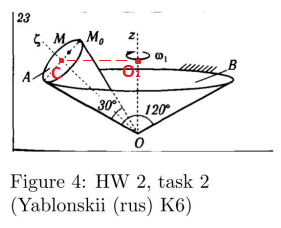

$OM_0 = 40; \omega_1 = 2; ε_1 = 3.7; M_0M = 5$

## Find

1. $ω_A, ε_A - ?$
1. $v_M, a_M - ?$
1. plot all of the above

## Solution

#### Prepare the timeline

In [ ]:
import numpy as np 

# set the timeframe
t0 = 0
t1 = np.pi/2 #Pi to make nice looped animation
dt = 0.01 #100 fps

T = np.arange(t0, t1, dt) # generate an array of timestamps

#### Prepare the constants

In [ ]:
OM0 = 40
omega1 = 2
epsilon1 = 3.7
M0M = 5

#### Angle $\theta$
$\theta_1 = \omega_1t + ε_1t^2$

In [ ]:
theta1 = [omega1*t + epsilon1*(t**2)/2 for t in T]
# print(theta)

#### Position of $C$

Assuming that $M_0$ is a point on the edge of the base of the cone

Let $C$ be a center of moving cone's base. $C$ moves around the axis $OZ$ in a perfect circle sine it has constant distance from smooth cone $B$.

Let $O_1$ be a projection of $C$ onto axis $OZ$.

Then $O_1C = OC*cos(120°/2 - 30°/2) = OC*cos(45°)\\
OC = OM_0*cos(30°/2) = OM_0*cos(15°)\\
O_1C = OM_0*cos(15°)*cos(45°) = 10 + 10 \sqrt{3}  \simeq 27.32$

$CM_0 = OM_o * sin(15°) = -10 \sqrt{2} + 10 \sqrt{6} \simeq 10.353$

$O_1C$ - is a radius of the circle traced by point $C$

$v_C = O_1C*\omega_1$

$\underline{C(t) = 
\begin{bmatrix}
cos(\theta)cos(45°)OC\\
sin(\theta)cos(45°)OC\\
sin(45°)OC
\end{bmatrix} 
=
\begin{bmatrix}
cos(\theta)\\
sin(\theta)\\
1
\end{bmatrix}(10 + 10 \sqrt{3})
\simeq 
\begin{bmatrix}
cos(\theta)\\
sin(\theta)\\
1
\end{bmatrix}27.32}$

In [ ]:
M0C = OM0*np.sin(np.radians(15))
OC = OM0*np.cos(np.radians(15))
C = np.array([np.cos(theta1), np.sin(theta1), [1]*len(theta1)])*(10+10*np.sqrt(3))
# print(C)

#### Angular Velocity of body $A$

$v_M0 = 2v_C$ - since $v_C$ is the speed of the point furthermost from ICR (point of contact of bodies $A$ and $B$).

$\omega_A = \frac{v_C}{CM_0} = \frac{O_1C*\omega_1}{OM_o * sin(15°)} = \frac{OM_0*cos(15°)*cos(45°)*\omega_1}{OM_o * sin(15°)}$

$\underline{\omega_A = \left(\sqrt{\frac{3}{2}} + \sqrt{2}\right)\omega_1}$

In [ ]:
 omegaA = omega1*(np.sqrt(3/2) + np.sqrt(2))

#### Angular Acceleration of body $A$

Same relation goes for the andgular acceleration

$\underline{ε_A = cos(45°)*ε_1 = 1.85\sqrt{2}}$

In [ ]:
epsilonA = epsilon1*(np.sqrt(3/2) + np.sqrt(2))

#### Rotation of body $A$
$\theta_A = \omega_At + ε_At^2$

In [ ]:
thetaA = [omegaA*t + epsilonA*(t**2)/2 for t in T]

#### Position of point M
$\underline{\vec{OM} = \vec{OC} + \vec {CM} = \vec{OC} + R_z(\theta_1)*R_y(60°)*R_z(\theta_A)*-\vec{i}*CM}$

$\vec{CM} = 
\begin{bmatrix}
cos(\theta_1) & -sin(\theta_1) & 0\\
sin(\theta_1) & cos(\theta_1) & 0\\
0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
cos(60°) & 0 & sin(60°)\\
0 & 1 & 0\\
-sin(60°) & 0 & cos(60°)\\
\end{bmatrix}
\begin{bmatrix}
cos(\theta_A) & -sin(\theta_A) & 0\\
sin(\theta_A) & cos(\theta_A) & 0\\
0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
-CM\\
0\\
0\\
\end{bmatrix}
$

#### Rotation matricies 

In [ ]:
import functools

@functools.lru_cache()
def Rx(theta):
  return np.matrix([[ 1, 0            , 0           ],
                    [ 0, np.cos(theta),-np.sin(theta)],
                    [ 0, np.sin(theta), np.cos(theta)]])
  
@functools.lru_cache()
def Ry(theta):
  return np.matrix([[ np.cos(theta), 0, np.sin(theta)],
                    [ 0            , 1, 0           ],
                    [-np.sin(theta), 0, np.cos(theta)]])

@functools.lru_cache()
def Rz(theta):
  return np.matrix([[ np.cos(theta), -np.sin(theta), 0 ],
                    [ np.sin(theta), np.cos(theta) , 0 ],
                    [ 0            , 0             , 1 ]])
  
def Ra(theta1, thetaA):
  return Rz(-theta1)@Ry(np.radians(45))@Rz(thetaA)

#### Position of M

In [ ]:
M = np.transpose([Ra(theta1[t], thetaA[t])@np.array([M0M-M0C, 0, OC]) for t in range(len(T))])[:,0]
print(M.shape)

(3, 158)


#### Velocities and Accelerations of M
Velocitiy is a derivative of Position

Acceleration is a derivative of Velocitiy

In [ ]:
vM = np.array([np.gradient(p, T) for p in M])
aM = np.array([np.gradient(p, T) for p in vM])

def project(u, v):
  ret = np.dot(u, v)*v/np.dot(v, v)
  return ret

aMn = np.transpose(list(map(project, np.transpose(aM), np.transpose(vM))))
aMt = np.array(aM) - aMn

### Plot

In [ ]:
from matplotlib.lines import Line2D
# Gateher all the moving vectors and plug them into given plots ax1 (dynamic), ax2 (static)
class draw_vec:
  def __init__(self, labels, parent, vectors, ax1, ax2, col=None, lw1=None, lw2=None, scale=None, scale1 = 1):
    self.n = len(vectors)
    self.parent = {'x': parent[0], 'y':parent[1]}
    self.vectors = {'x': vectors[:, 0], 'y':vectors[:, 1]}
    self.q1 = ax1.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, visible=False,
                         zorder = 10)
    


  def draw(self, n, show = True):
    self.q1.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q2.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q1.set_offsets([self.parent['x'][n], self.parent['y'][n]])
    self.q1.set_visible(show)
    self.q2.set_visible(show)

  def getVectors(self):
    return([self.q1, self.q2])

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


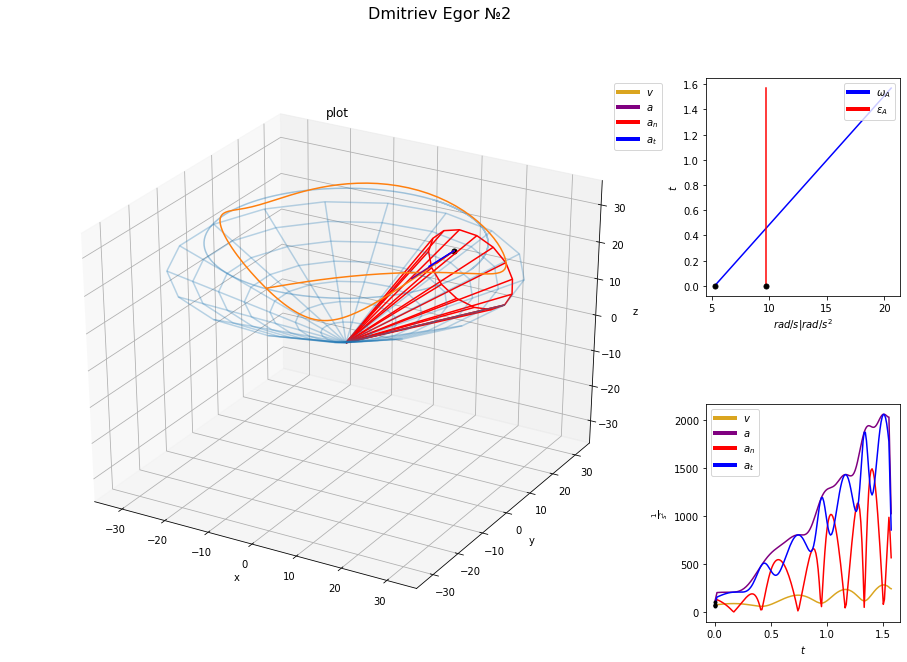

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import axes3d
vs = 0.1 #vector scale

%matplotlib inline

# setup the plot
grid = plt.GridSpec(2, 4, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(16,10))
fig.suptitle("Dmitriev Egor №2", fontsize=16)
ax1 = plt.subplot(grid[:, :3], projection='3d')
ax1.set_xlim3d(-35, 35)
ax1.set_ylim3d(-35, 35)
ax1.set_zlim3d(-35, 35)
ax1.set_xlabel(r"x")
ax1.set_ylabel(r"y")
ax1.set_zlabel(r"z")
# print(ax1.elev, ax1.azim)
# ax1.view_init(10, 100)
txt_title = ax1.set_title('plot')

ax2 = plt.subplot(grid[0, 3])
ax2.set_xlabel(r'$rad/s | rad/s^2$')
ax2.set_ylabel(r'$t$')

ax3 = plt.subplot(grid[1, 3])
ax3.set_xlabel(r'$t$')
ax3.set_ylabel(r'$\frac{1}{s^2}$')


labels = [r'$v$', r'$a$', r'$a_n$', r'$a_t$']
custom_lines = [Line2D([0], [0], color=i, lw=4) for i in
                ['goldenrod', 'purple', 'red', 'blue']]
ax3.legend(custom_lines, labels, loc='upper left')
ax1.legend(custom_lines, labels)

c_theta = np.linspace(0,2*np.pi,18)
c_r = np.linspace(0,40,8)
c_T, c_R = np.meshgrid(c_theta, c_r)
A = [c_R*np.sin(np.radians(60))*np.cos(c_T),
     c_R*np.sin(np.radians(60))*np.sin(c_T),
     c_R*np.cos(np.radians(60))]

c_theta = np.linspace(0,2*np.pi,16)
c_r = np.linspace(0,40,2)
c_T, c_R = np.meshgrid(c_theta, c_r)
Bb = np.array([c_R*np.sin(np.radians(15))*np.cos(c_T),
               c_R*np.sin(np.radians(15))*np.sin(c_T),
               c_R*np.cos(np.radians(15))])

B=np.array([np.zeros_like(np.transpose(Bb))]*len(T))
# print(Bb.shape)
# print(B.shape)
for t in range(len(T)):
  for (i, line) in enumerate(np.transpose(Bb)):
    for (j, point) in enumerate(line):
      B[t][i][j] = Ra(theta1[t], thetaA[t])@point
B = np.transpose(B)


shape_A = ax1.plot_wireframe(*A, alpha=0.3)
shape_B = ax1.plot_wireframe(*(B[:,:,:,0]), colors='red')

ax1.plot(*C, alpha=0.4)
ax1.plot(*M, zorder = 7)
pm, = ax1.plot([M[0,0]], [M[1,0]], [M[2,0]], 'k.', ms=10)

ax2.plot(omegaA+T*epsilonA, T, 'b')
ax2.plot([epsilonA]*len(T), T, 'r')
p1, = ax2.plot((omegaA+T*epsilonA)[0], 0, 'k.', ms=10)
p2, = ax2.plot(epsilonA, 0, 'k.', ms=10)
handles = [Line2D([0], [0], color='b', lw=4),
           Line2D([0], [0], color='r', lw=4)]
lables = [r'$\omega_A$',
          r'$\epsilon_A$']
ax2.legend(handles, lables, loc='upper right')

l_v, = ax1.plot([M[0][0], M[0][0] + vM[0, 0]*vs],
                [M[1][0], M[1][0] + vM[1, 0]*vs],
                [M[2][0], M[2][0] + vM[2, 0]*vs], color = 'goldenrod', zorder = 10)
l_a, = ax1.plot([M[0][0], M[0][0] + aM[0, 0]*vs],
                [M[1][0], M[1][0] + aM[1, 0]*vs],
                [M[2][0], M[2][0] + aM[2, 0]*vs], color = 'purple', zorder = 10)
l_an, = ax1.plot([M[0][0], M[0][0] + aMn[0, 0]*vs],
                [M[1][0], M[1][0] + aMn[1, 0]*vs],
                [M[2][0], M[2][0] + aMn[2, 0]*vs], color = 'red', zorder = 10)
l_at, = ax1.plot([M[0][0], M[0][0] + aMt[0, 0]*vs],
                [M[1][0], M[1][0] + aMt[1, 0]*vs],
                [M[2][0], M[2][0] + aMt[2, 0]*vs], color = 'blue', zorder = 10)

l_v3, = ax3.plot(T, [np.linalg.norm(vM[:, n]) for n in range(len(T))],
                 color = 'goldenrod', zorder = 10)
l_a3, = ax3.plot(T, [np.linalg.norm(aM[:, n]) for n in range(len(T))],
                 color = 'purple', zorder = 10)
l_an3, = ax3.plot(T, [np.linalg.norm(aMn[:, n]) for n in range(len(T))],
                  color = 'red', zorder = 10)
l_at3, = ax3.plot(T, [np.linalg.norm(aMt[:, n]) for n in range(len(T))],
                  color = 'blue', zorder = 10)

p_v3, = ax3.plot(T[0], np.linalg.norm(vM[:, 0]), 'k.', zorder = 10)
p_a3, = ax3.plot(T[0], np.linalg.norm(aM[:, 0]), 'k.', zorder = 10)
p_an3, = ax3.plot(T[0], np.linalg.norm(aMn[:, 0]), 'k.', zorder = 10)
p_at3, = ax3.plot(T[0], np.linalg.norm(aMt[:, 0]), 'k.', zorder = 10)


def drawframe(n):
  l_v.set_data_3d([M[0][n], M[0][n] + vM[0, n]*vs],
                  [M[1][n], M[1][n] + vM[1, n]*vs],
                  [M[2][n], M[2][n] + vM[2, n]*vs])
  l_a.set_data_3d([M[0][n], M[0][n] + aM[0, n]*vs],
                  [M[1][n], M[1][n] + aM[1, n]*vs],
                  [M[2][n], M[2][n] + aM[2, n]*vs])
  l_an.set_data_3d([M[0][n], M[0][n] + aMn[0, n]*vs],
                   [M[1][n], M[1][n] + aMn[1, n]*vs],
                   [M[2][n], M[2][n] + aMn[2, n]*vs])
  l_at.set_data_3d([M[0][n], M[0][n] + aMt[0, n]*vs],
                   [M[1][n], M[1][n] + aMt[1, n]*vs],
                   [M[2][n], M[2][n] + aMt[2, n]*vs])
  
  p_v3.set_data(T[n], np.linalg.norm(vM[:, n]))
  p_a3.set_data(T[n], np.linalg.norm(aM[:, n]))
  p_an3.set_data(T[n], np.linalg.norm(aMn[:, n]))
  p_at3.set_data(T[n], np.linalg.norm(aMt[:, n]))

  global shape_B
  global pm
  if shape_B is not None:
    shape_B.set_visible(False)
    shape_B.remove()
  if pm is not None:
    pm.set_visible(False)
    # pm.remove()
  shape_B = ax1.plot_wireframe(*(B[:,:,:,n]), colors='red')

  pm, = ax1.plot([M[0,n]], [M[1,n]], [M[2,n]], 'k.', ms=10)
  p1.set_data((omegaA+T*epsilonA)[n], T[n])
  p2.set_data(epsilonA, T[n])

  txt_title.set_text('t = {0:4f}'.format(T[n]))
  return()

In [ ]:
from matplotlib import animation
# blit=True re-draws only the parts that have changed.


#comment to run online
# plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\egord\AppData\Local\ffmpeg\bin\ffmpeg.exe'
anim = animation.FuncAnimation(fig, drawframe, frames=len(T), interval=5000/len(T), blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)
